In [7]:
from adaptive_dg.evaluation.model_loading import compute_best_metrics
from pathlib import Path
import numpy as np
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches

# Select results due to best model on validation set

In [3]:

all_results = {}

directory = "log_simpson/"


model_classes = ['PredYfromX', 'PredYfromXSet', 'PredYfromXE', 'PredEfromX', 'PredEfromXSet']
data_set = 'Simpson'

domains = [0,1,2,3,4]
seeds = [42, 43, 44, 45, 46]

for domain in domains:
    all_results[domain] = {}
    for model_class in model_classes:
        all_results[domain][model_class] = {}
        for seed in seeds:
            # Returns performance metric according to the best model on the validation set
            # first entry is performance on validation, second on test, and, third on OOD set
            all_results[domain][model_class][seed] = compute_best_metrics(directory, data_set, domain, model_class, seed=seed, version=0)

/home/jens/Desktop/paper3/adaptive_dg/adaptive_dg/evaluation/model_loading.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_selection = losses_val.idxmin()[0]
/home/jens/Desktop/paper3/adaptive_dg/adaptive_dg/evaluation/model_loading.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model_selection = losses_val.idxmin()[0]
/home/jens/Desktop/paper3/adaptive_dg/adaptive_dg/evaluation/model_loading.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po

# Compute Criteria

In [5]:
criteria = {}
metric = 'mse'
data_splits = ["val", "test", "ood"]
for domain in domains:
    criteria[domain] = {}
    for i_split, set in enumerate(data_splits):
        criteria[domain][f"I_{set}"] = []
        criteria[domain][f"II_{set}"] =  []
        criteria[domain][f"III_{set}"] =  []
        for seed in seeds:
            criteria[domain][f"III_{set}"].append(-(all_results[domain]['PredEfromX'][seed][i_split] - all_results[domain]["PredEfromXSet"][seed][i_split]  ) / all_results[domain]['PredEfromX'][seed][i_split])
            if metric == 'acc':
                criteria[domain][f"I_{set}"].append(-(all_results[domain]['PredYfromX'][seed][i_split] - all_results[domain]["PredYfromXSet"][seed][i_split]  ) / all_results[domain]['PredYfromX'][seed][i_split])
                criteria[domain][f"II_{set}"].append(-(all_results[domain]['PredYfromX'][seed][i_split] - all_results[domain]["PredYfromXE"][seed][i_split]  ) / all_results[domain]['PredYfromX'][seed][i_split])
            else:
                criteria[domain][f"I_{set}"].append((all_results[domain]['PredYfromX'][seed][i_split] - all_results[domain]["PredYfromXSet"][seed][i_split]  ) / all_results[domain]['PredYfromX'][seed][i_split])
                criteria[domain][f"II_{set}"].append((all_results[domain]['PredYfromX'][seed][i_split] - all_results[domain]["PredYfromXE"][seed][i_split]  ) / all_results[domain]['PredYfromX'][seed][i_split])

/tmp/ipykernel_2282369/2058499405.py:11: RuntimeWarning: invalid value encountered in scalar divide
  criteria[domain][f"III_{set}"].append(-(all_results[domain]['PredEfromX'][seed][i_split] - all_results[domain]["PredEfromXSet"][seed][i_split]  ) / all_results[domain]['PredEfromX'][seed][i_split])


# Plot Criteria

# 

/tmp/ipykernel_2282369/1909291670.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x="Domain", y="value", data=df_all, palette=colors, ax=ax, order=[0,1,2,3.5])
/tmp/ipykernel_2282369/1909291670.py:35: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  ax = sns.violinplot(x="Domain", y="value", data=df_all, palette=colors, ax=ax, order=[0,1,2,3.5])
/tmp/ipykernel_2282369/1909291670.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['I', 'II', 'III', 'I (OOD)'], fontsize=15)
/tmp/ipykernel_2282369/1909291670.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for t

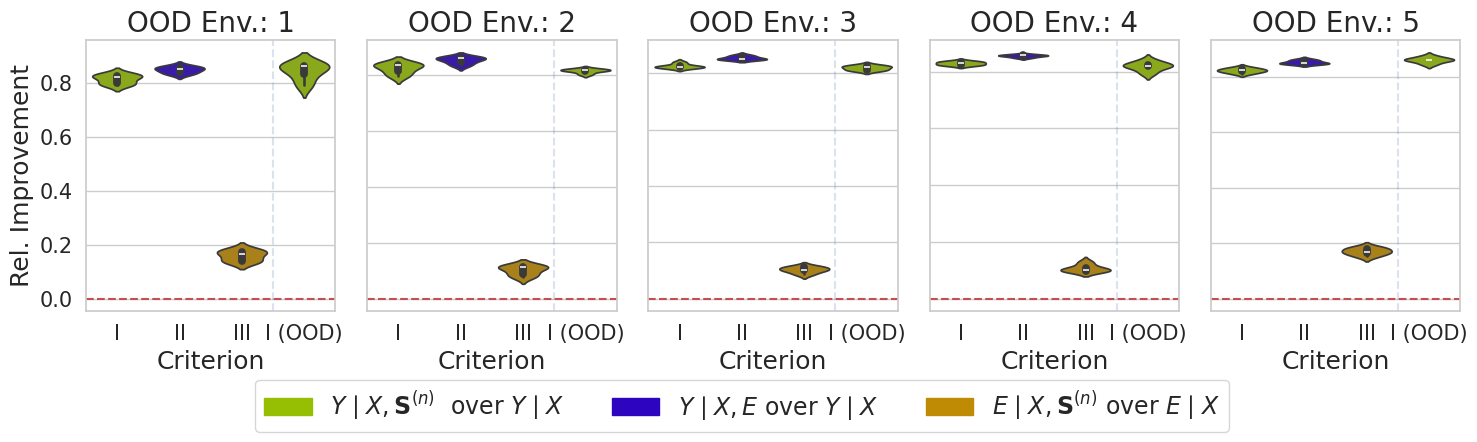

In [9]:
fig, axs = plt.subplots(1,5, figsize=(15,4))
plt.rc("font", family="Ubuntu")

# define color schemes 
color1 = "#96bf04"
color2 = "#2d04bf"
color3  = "#bf8b04"
color4 = "#bf0496"
colorb1 = "#0496bf"
colorb2 = "#2d04bf"
colors = [color1, color2, color3, color1, colorb1, colorb2]


for e_num, ax in enumerate(axs.flatten()):
    dom = domains[e_num]

    df_I = pd.DataFrame({"value": criteria[dom]["I_test"], "Domain": [0]*len(criteria[dom]["I_test"]),
                           "label": [r"$Y \mid X, \mathbf{S}^{(n)}$ over $Y \mid X$"]*len(criteria[dom]["I_test"])})
    df_II = pd.DataFrame({"value": criteria[dom]["II_test"], "Domain": [1]*len(criteria[dom]["II_test"]),
                          "label": [r"$E \mid X, \mathbf{S}^{(n)}$ over $E \mid X$"]*len(criteria[dom]["II_test"])})
    df_III = pd.DataFrame({"value": criteria[dom]["III_test"], "Domain": [2]*len(criteria[dom]["II_test"]),
                           "label": [r"$Y \mid X, E$ over $Y \mid X$"]*len(criteria[dom]["II_test"])})

    df_ood = pd.DataFrame({"value": criteria[dom]["I_ood"], "Domain": [3.5]*len(criteria[dom]["I_ood"]),
                           "label": [r"$Y \mid X, \mathbf{S}^{(n)}$ over $Y \mid X$ (OOD)"]*len(criteria[dom]["I_ood"]) })

    df_all = pd.concat([df_I, df_II, df_III, df_ood], axis=0)

        
    sns.set_theme(style="whitegrid")

    if e_num < 0:
        ax = sns.violinplot(x="Domain", y="value", data=df_all, palette=colors, ax=ax, order=[0,1,2,3.5], hue="label")
    else:
        ax = sns.violinplot(x="Domain", y="value", data=df_all, palette=colors, ax=ax, order=[0,1,2,3.5])

    ax.set_xticklabels(['I', 'II', 'III', 'I (OOD)'], fontsize=15)
    ax.tick_params(axis='both', which='major', labelsize=15)
    ax.tick_params(axis='both', which='minor', labelsize=15)

    # horizontal red line
    ax.axhline(0, color="r", linestyle="--")
    ax.axvline(2.5, color="b", linestyle="--", alpha=0.2)

    ax.set_xlabel("Criterion", fontsize=18)
    if e_num == 0:
        ax.set_ylabel("Rel. Improvement", fontsize=18)
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])
    ax.set_title(f"OOD Env.: {dom+1}", fontsize=20)
    


patch_i = mpatches.Patch(color=color1, label=r"$Y \mid X, \mathbf{S}^{(n)}$  over $Y \mid X$")
patch_ii = mpatches.Patch(color=color2, label=r"$Y \mid X, E$ over $Y \mid X$")
patch_iii = mpatches.Patch(color=color3, label=r"$E \mid X, \mathbf{S}^{(n)}$ over $E \mid X$")

fig.legend(handles=[patch_i, patch_ii, patch_iii],loc='lower center', bbox_to_anchor=(0.5, -0.13), ncol=3, fontsize=17)
plt.tight_layout()

plt.savefig(f"result_plots/crit_{data_set}.png", bbox_inches='tight', dpi=300)
plt.show()